# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
import random # create a list random geographic coordinates (lat. & lon) for wihc you want to find the nearest cities.
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"  # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
# code of exercise Burundi
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response =  requests.get(city_url)
        city_weather =response.json() # YOUR CODE HERE
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] # YOUR CODE HERE
        city_lng = city_weather['coord']['lon'] # YOUR CODE HERE
        city_max_temp =city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity'] # YOUR CODE HERE
        city_clouds =city_weather['clouds'] ['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country'] # YOUR CODE HERE
        city_date = city_weather['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | mejit
Processing Record 4 of Set 1 | ola
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | maizuru
Processing Record 7 of Set 1 | san angelo
Processing Record 8 of Set 1 | mineiros
Processing Record 9 of Set 1 | coahuayana de hidalgo
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | shingu
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set 1 | hammerfest
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE
# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,richards bay,-28.7830,32.0377,298.71,35,0,5.71,ZA,1717081666
1,olonkinbyen,70.9221,-8.7187,272.60,86,100,2.39,SJ,1717081666
2,mejit,10.2753,170.8646,300.83,79,100,5.66,MH,1717081666
3,ola,59.5833,151.2833,284.34,64,5,0.80,RU,1717081667
4,edinburgh of the seven seas,-37.0676,-12.3116,285.32,61,15,5.92,SH,1717081667


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,richards bay,-28.7830,32.0377,298.71,35,0,5.71,ZA,1717081666
1,olonkinbyen,70.9221,-8.7187,272.60,86,100,2.39,SJ,1717081666
2,mejit,10.2753,170.8646,300.83,79,100,5.66,MH,1717081666
3,ola,59.5833,151.2833,284.34,64,5,0.80,RU,1717081667
4,edinburgh of the seven seas,-37.0676,-12.3116,285.32,61,15,5.92,SH,1717081667


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

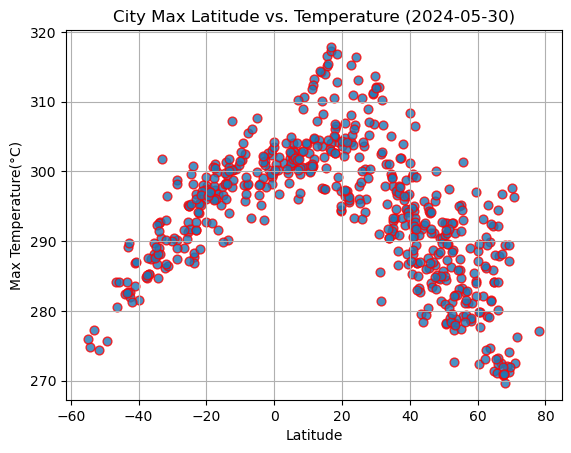

In [135]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'],
            y=city_data_df['Max Temp'],
            color='tab:blue', edgecolor='r', 
            alpha=0.80, s=40
           ) # YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (%s)' % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(°C)')
plt.grid(True)
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

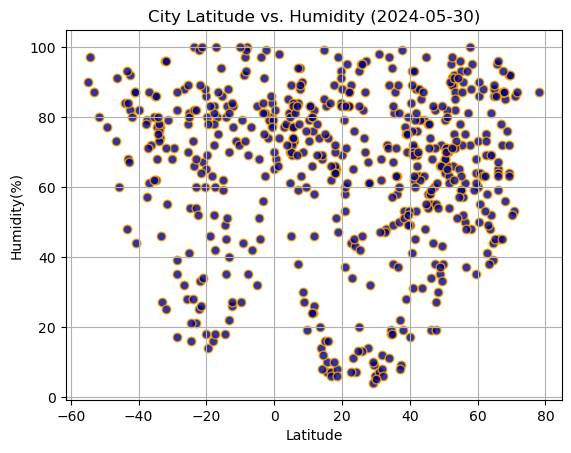

In [142]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'],
            y=city_data_df['Humidity'],
           color='navy',
          edgecolor='orange', 
             alpha=0.80, s=40
)# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True) # YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

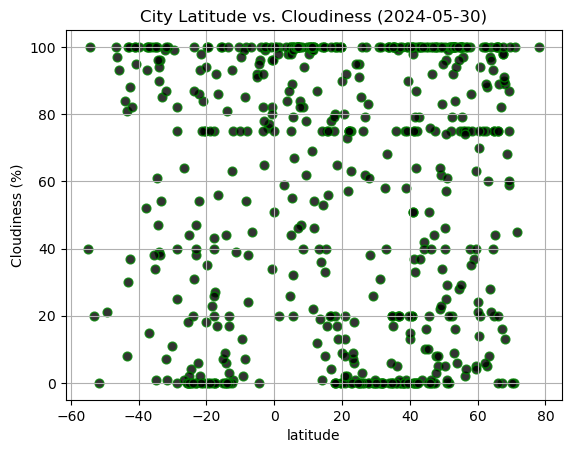

In [144]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'],
            y=city_data_df['Cloudiness'], 
            color='black', edgecolor='g', 
            alpha=0.80, s=40
           )# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime("%Y-%m-%d"))# YOUR CODE HERE
plt.ylabel('Cloudiness (%)')
plt.xlabel('latitude')
plt.grid (True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

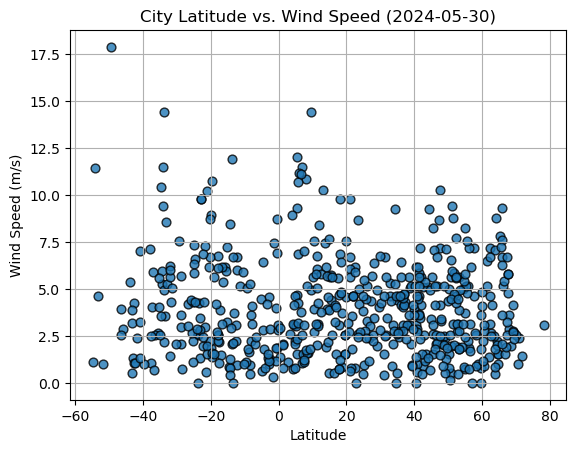

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], 
            y=city_data_df['Wind Speed'],
            color='tab:blue', edgecolor='k', 
            alpha=0.80,s=40
           )# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime("%Y-%m-%d"))
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, variable_X):

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

      # Scatter plot
    plt.scatter(x_values,y_values, color='tab:green', edgecolor='black', alpha=0.80, s=40)

    # Plot regression line and annotate 'line equation'
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values), max(y_values)), fontsize=14, color='red', xytext=(60,15), # I want
         textcoords='offset points', ha='center', va='bottom',
          bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
              


     # Label plot and title
    plt.xlabel('Latitude')
    plt.ylabel(variable_X)
    # plt.title(title)

   # Print r square value
    print(f"R squared: {rvalue**2:.4f}")
    print(f"The r-value is: {rvalue:.3f}")
    

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,272.60,86,100,2.39,SJ,1717081666
2,mejit,10.2753,170.8646,300.83,79,100,5.66,MH,1717081666
3,ola,59.5833,151.2833,284.34,64,5,0.80,RU,1717081667
5,maizuru,35.4500,135.3333,290.99,81,100,2.45,JP,1717081668
6,san angelo,31.4638,-100.4370,302.56,62,0,6.69,US,1717081642


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,richards bay,-28.7830,32.0377,298.71,35,0,5.71,ZA,1717081666
4,edinburgh of the seven seas,-37.0676,-12.3116,285.32,61,15,5.92,SH,1717081667
7,mineiros,-17.5694,-52.5511,297.39,42,0,2.20,BR,1717081668
9,port alfred,-33.5906,26.8910,292.69,77,96,3.58,ZA,1717081486
10,grytviken,-54.2811,-36.5092,274.79,97,100,11.44,GS,1717081670


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.5958
The r-value is: -0.772


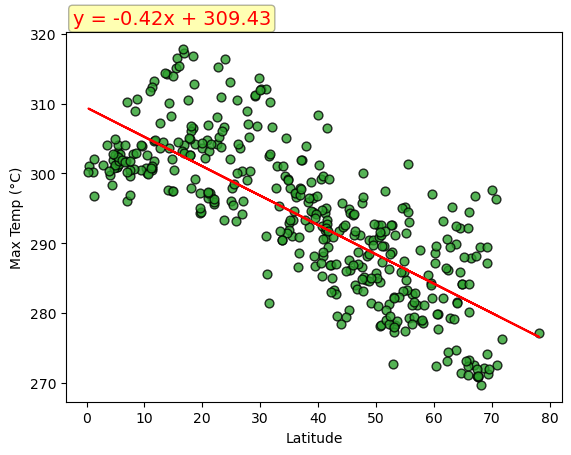

In [125]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp (°C)')

R squared: 0.7378
The r-value is: 0.859


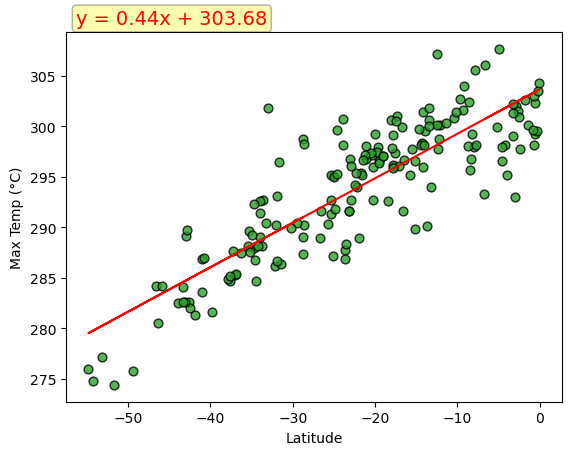

In [126]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp (°C)')

**Discussion about the linear relationship:** According to the results, there is a strong relationship between temperature and latitude in both hemispheres, but with opposite directions: in the Northern Hemisphere, the relationship is negative, while in the Southern Hemisphere, it is positive. In other words, as latitude increases in the Northern Hemisphere, temperature decreases, and as latitude increases in the Southern Hemisphere, temperature increases.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.0102
The r-value is: 0.101


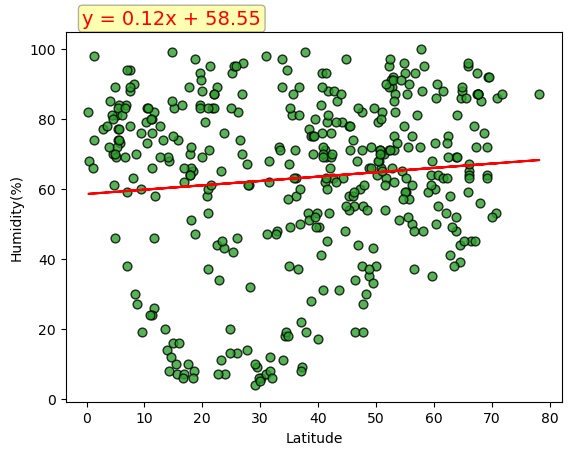

In [127]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity'].astype('float')
plot_linear_regression(x_values, y_values, 'Humidity(%)')

R squared: 0.0043
The r-value is: -0.066


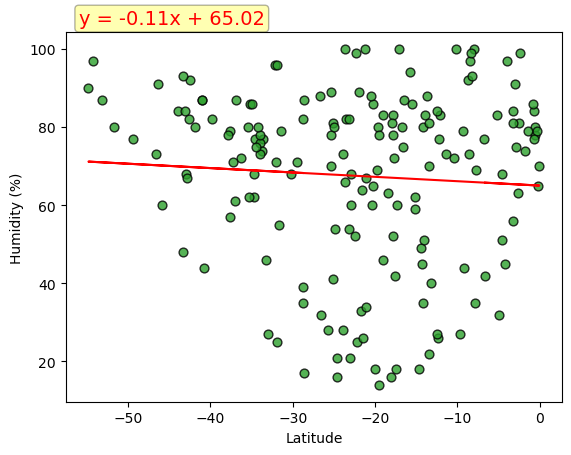

In [128]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity'].astype('float')
plot_linear_regression(x_values, y_values, 'Humidity (%)')

**Discussion about the linear relationship:**These results suggest a weak relationship between humidity and latitude in both hemispheres. However, this relationship is positive in the Northern Hemisphere and slightly negative in the Southern Hemisphere. Specifically, a minor increase in latitude corresponds to an increase in humidity in the Northern Hemisphere, while a minor decrease in latitude corresponds to a decrease in humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.0005
The r-value is: -0.023


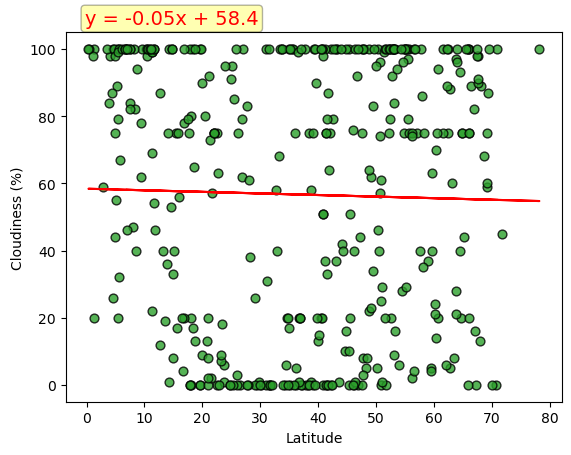

In [129]:
# Northern Hemisphere
# YOUR CODE HERE
# Declare variables
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Cloudiness'].astype('float')
plot_linear_regression(x_values, y_values, 'Cloudiness (%)')

R squared: 0.0002
The r-value is: -0.013


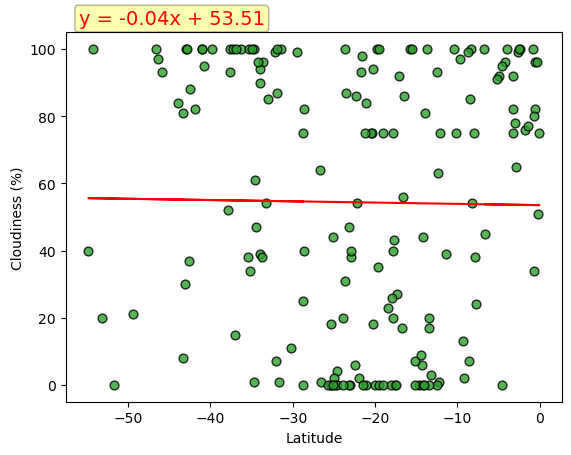

In [130]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values =southern_hemi_df['Cloudiness'].astype('float')
plot_linear_regression(x_values, y_values, 'Cloudiness (%)')

**Discussion about the linear relationship:** These results, as shown in the graph, indicate a very weak relationship between cloudiness and latitude in both the Northern and Southern Hemispheres. This is evidenced by the extremely low R-squared values and the minimal impact of latitude on cloudiness levels.





### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0103
The r-value is: -0.101


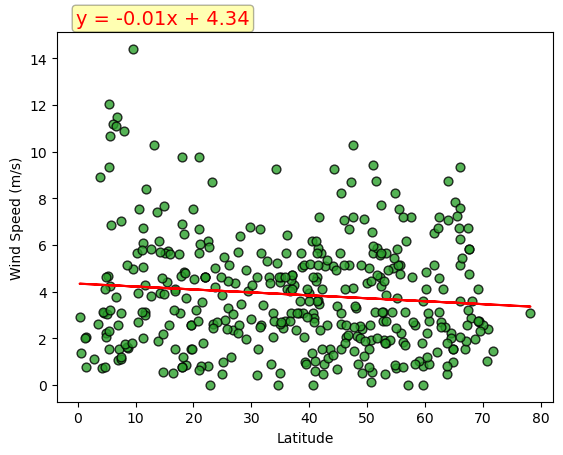

In [131]:
# Northern Hemisphere
# YOUR CODE HERE
#Declare variables
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed (m/s)')

R squared: 0.0287
The r-value is: -0.169


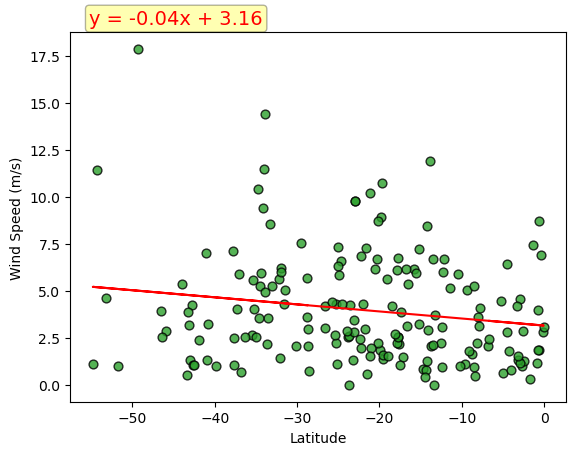

In [132]:
# Southern Hemisphere
# YOUR CODE HERE
#Declare variables
x_values =southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed (m/s)')

**Discussion about the linear relationship:** Both models exhibit weak correlations between latitude and wind speed in their respective hemispheres. The Southern Hemisphere model has a slightly higher R-squared value, indicating a marginally better fit.